In [1]:
import pandas as pd#, networkx as nx
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics

Invalid IHDR data. Cannot save the image grid_1gh-5_2019-02-15_22:09hist.png
Invalid IHDR data. Cannot save the image grid9_1bh-7_2019-02-13_15:08hist.png


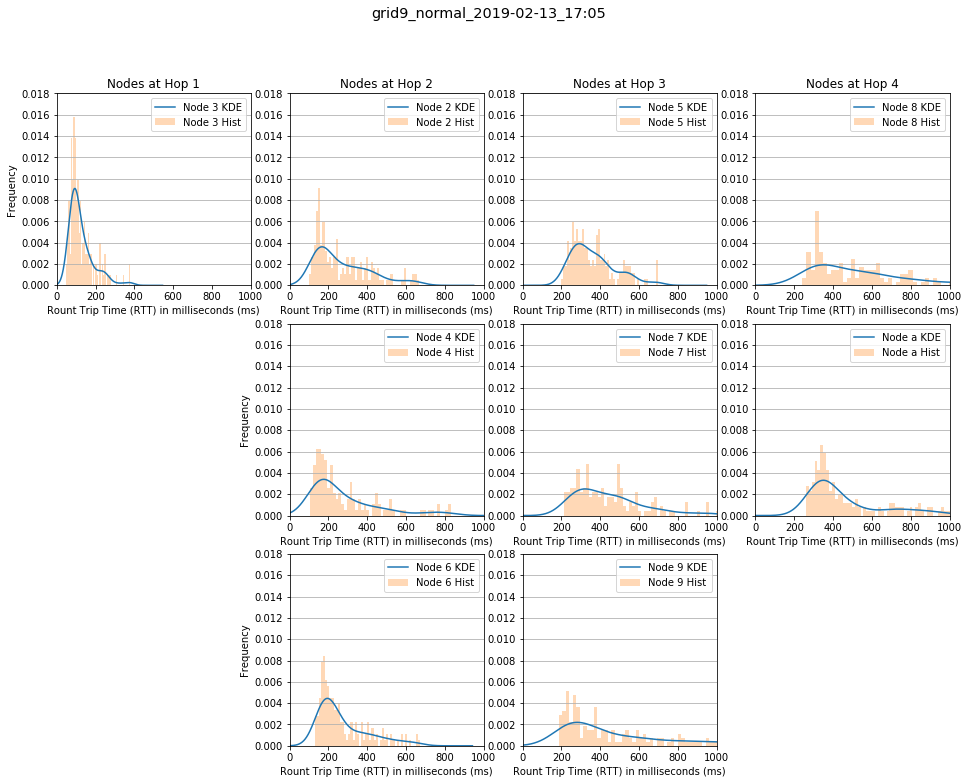

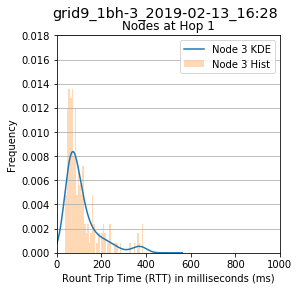

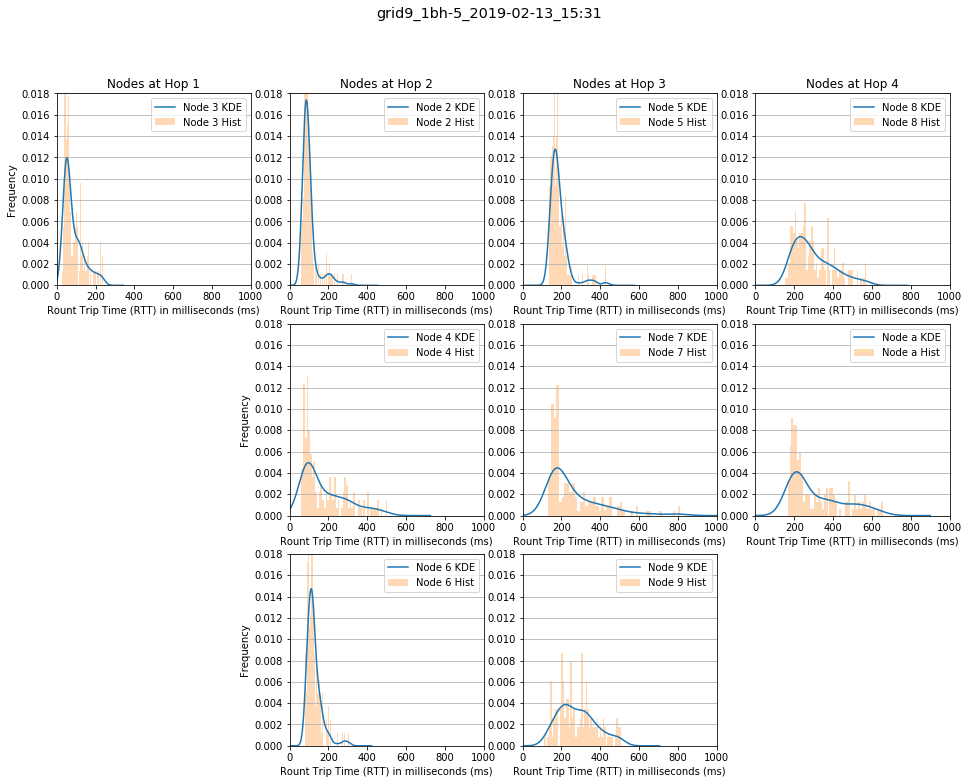

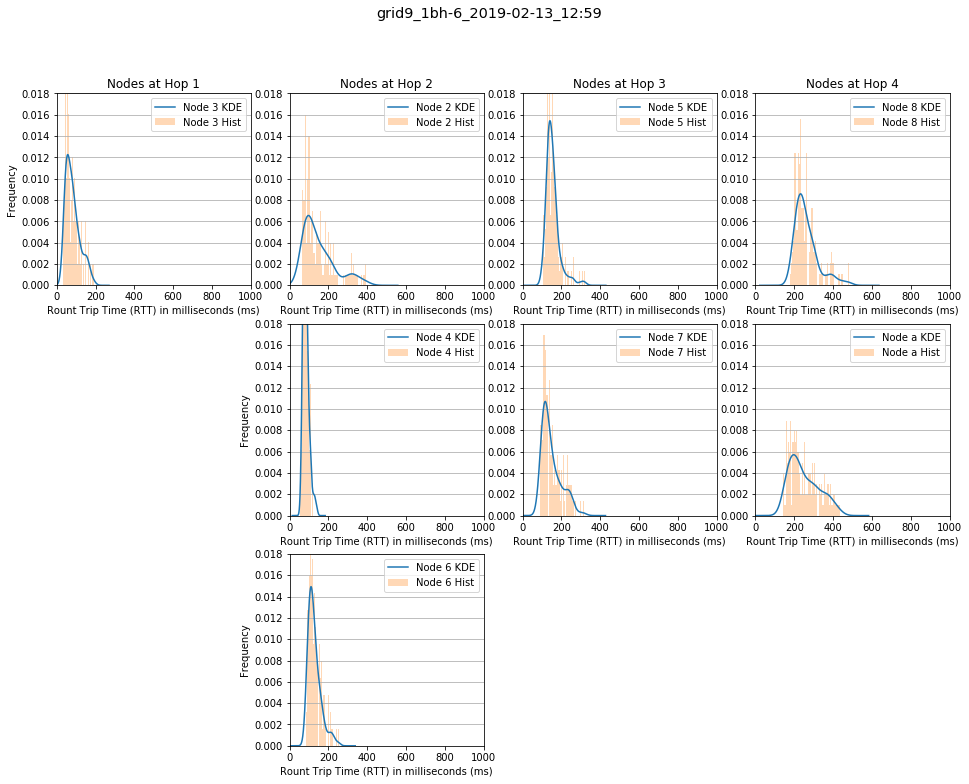

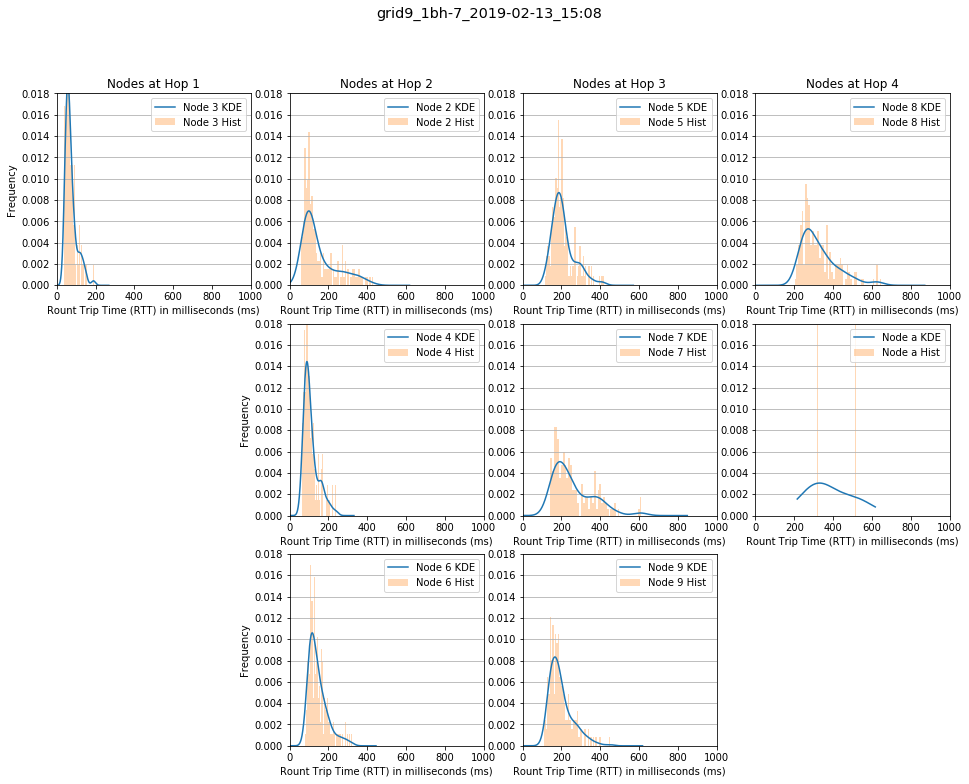

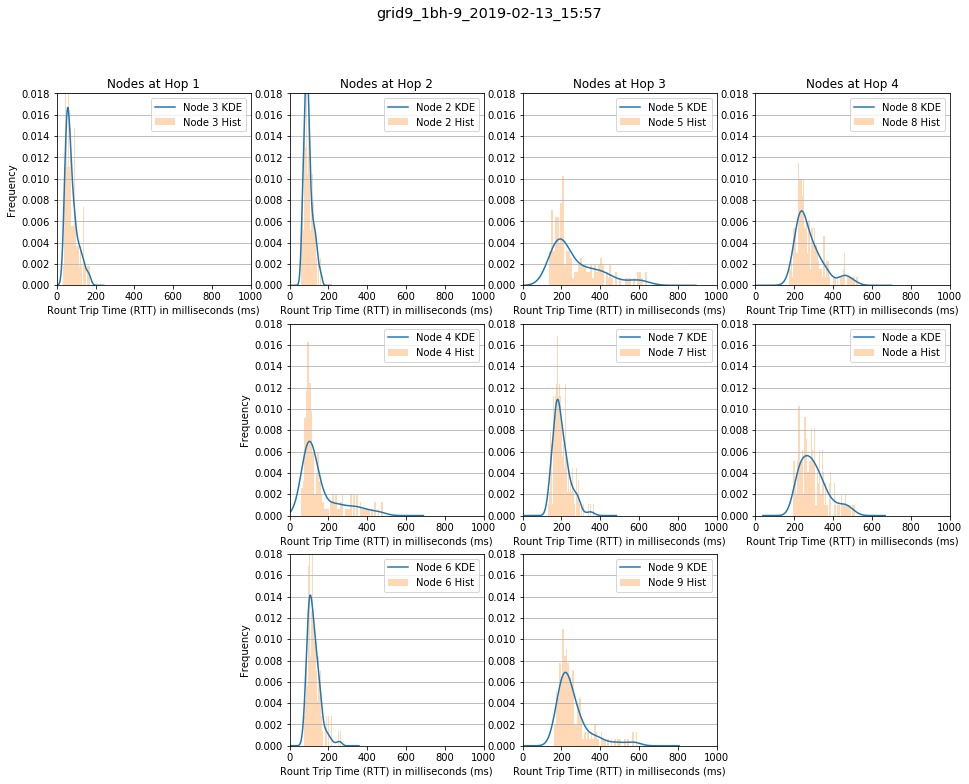

<Figure size 0x0 with 0 Axes>

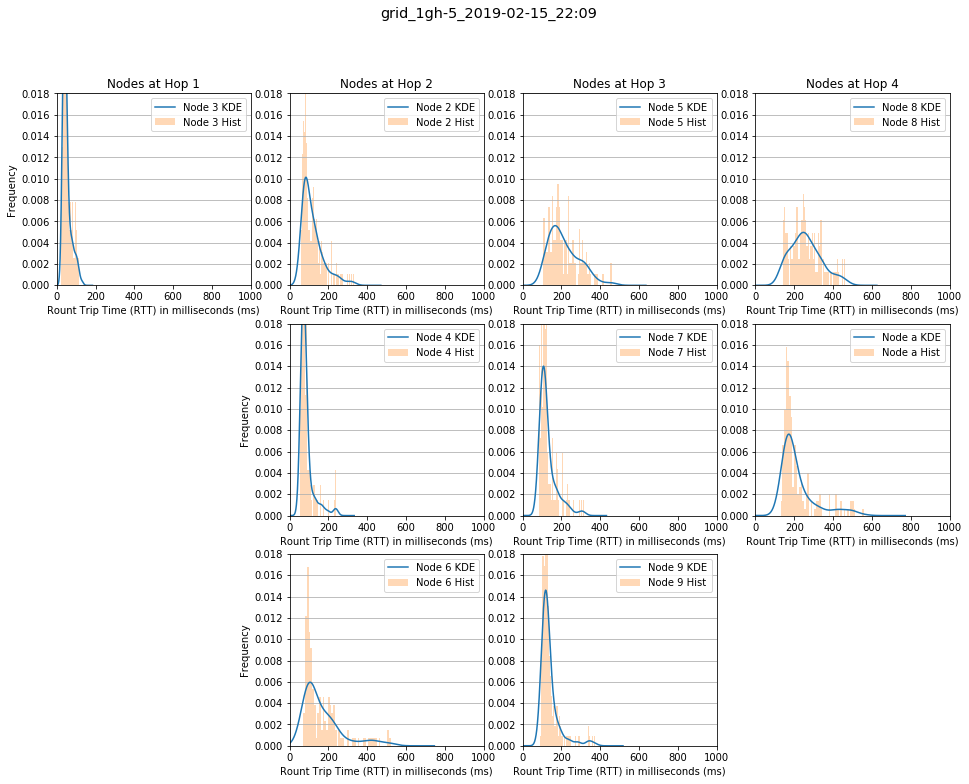

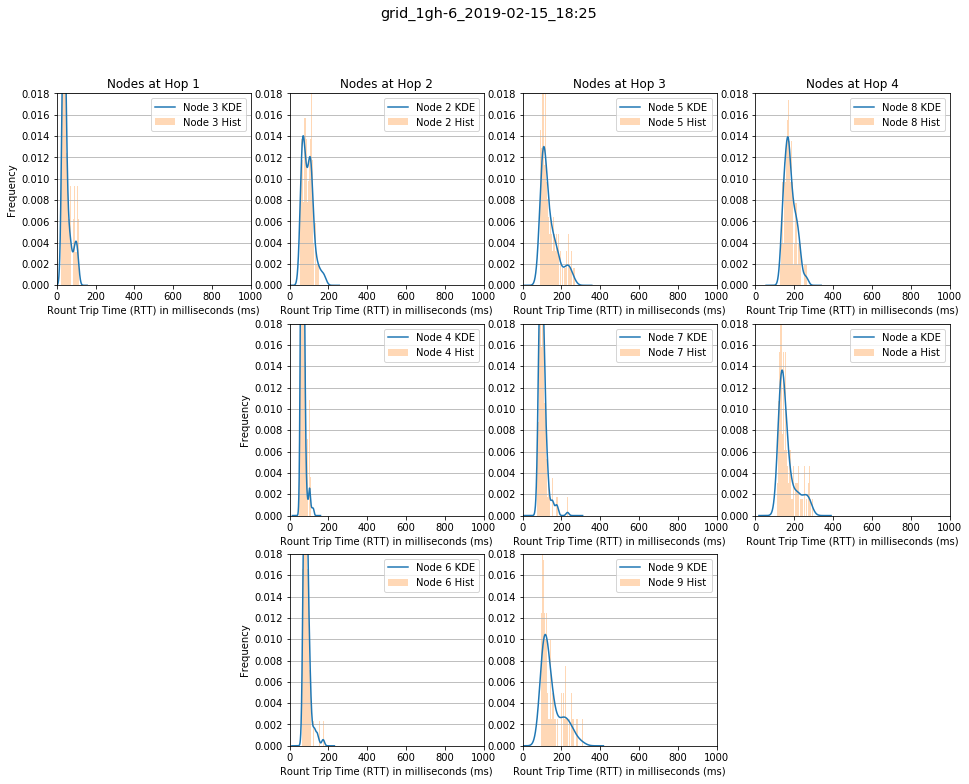

<Figure size 0x0 with 0 Axes>

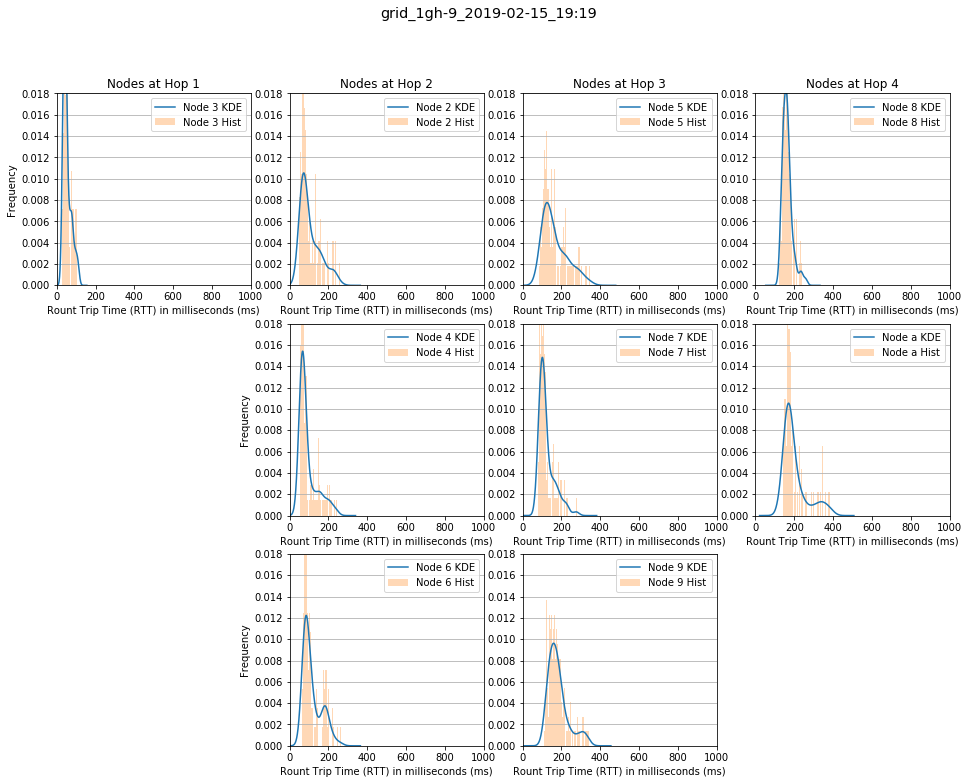

In [2]:
plots = [("traces/normal/", 'grid9_normal_2019-02-13_17:05'),
         ("traces/1bh-3/", 'grid9_1bh-3_2019-02-13_16:28'),
         ("traces/1bh-5/", 'grid9_1bh-5_2019-02-13_15:31'),
         ("traces/1bh-6/", 'grid9_1bh-6_2019-02-13_12:59'),
         ("traces/1bh-7/", 'grid9_1bh-7_2019-02-13_15:08'),
         ("traces/1bh-9/", 'grid9_1bh-9_2019-02-13_15:57'),
         ("traces/1gh-3/", 'grid_1gh-5_2019-02-15_22:09'),
         ("traces/1gh-5/", 'grid_1gh-5_2019-02-15_22:09'),
         ("traces/1gh-6/", 'grid_1gh-6_2019-02-15_18:25'),
         ("traces/1gh-7/", 'grid9_1bh-7_2019-02-13_15:08'),
         ("traces/1gh-9/", 'grid_1gh-9_2019-02-15_19:19')
        ]

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_hops_nodes(nodes, clean, 1000, 0.018, row[1])

Tumbling windows

Invalid IHDR data. Cannot save the image grid_1gh-5_2019-02-15_22:09-tumbling.png
Invalid IHDR data. Cannot save the image grid9_1bh-7_2019-02-13_15:08-tumbling.png


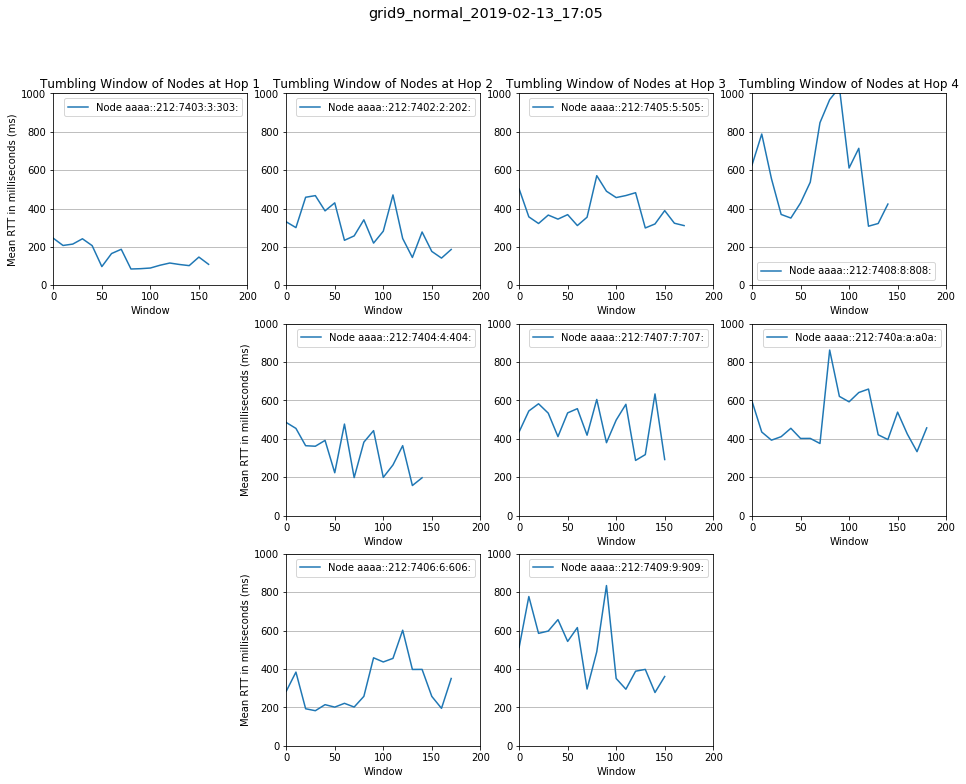

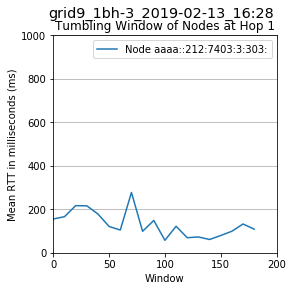

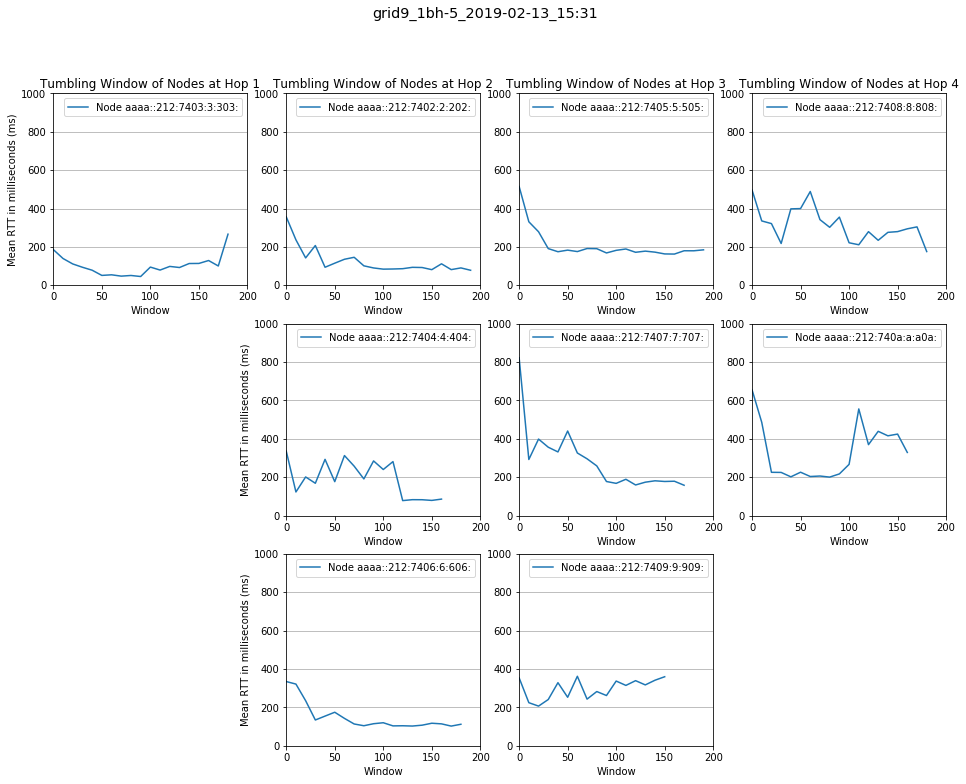

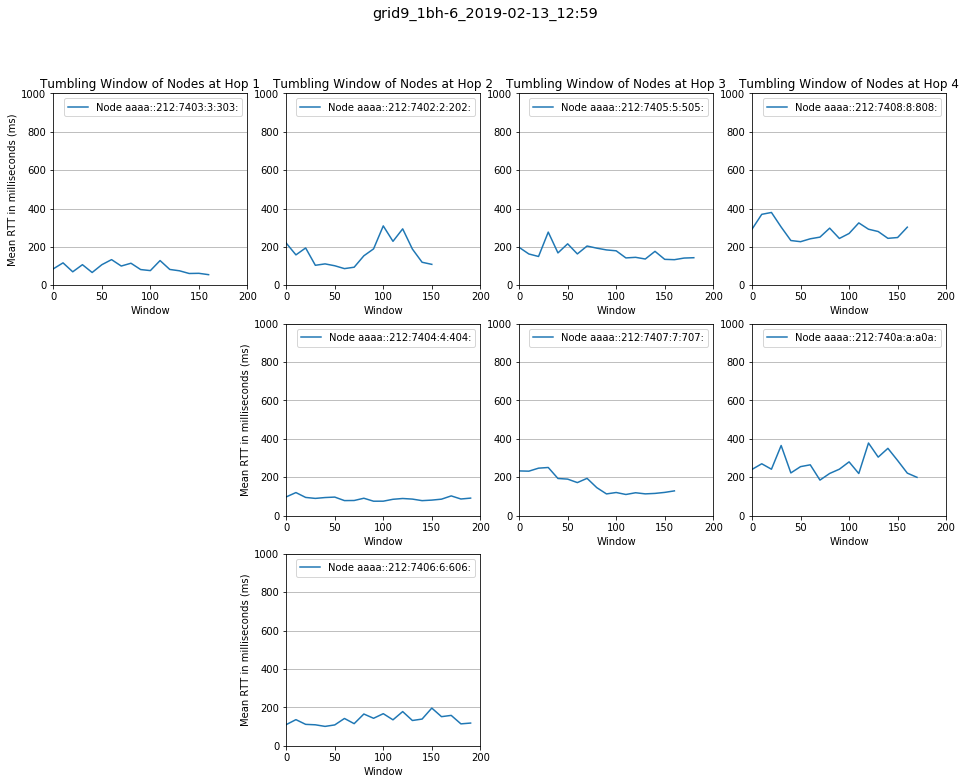

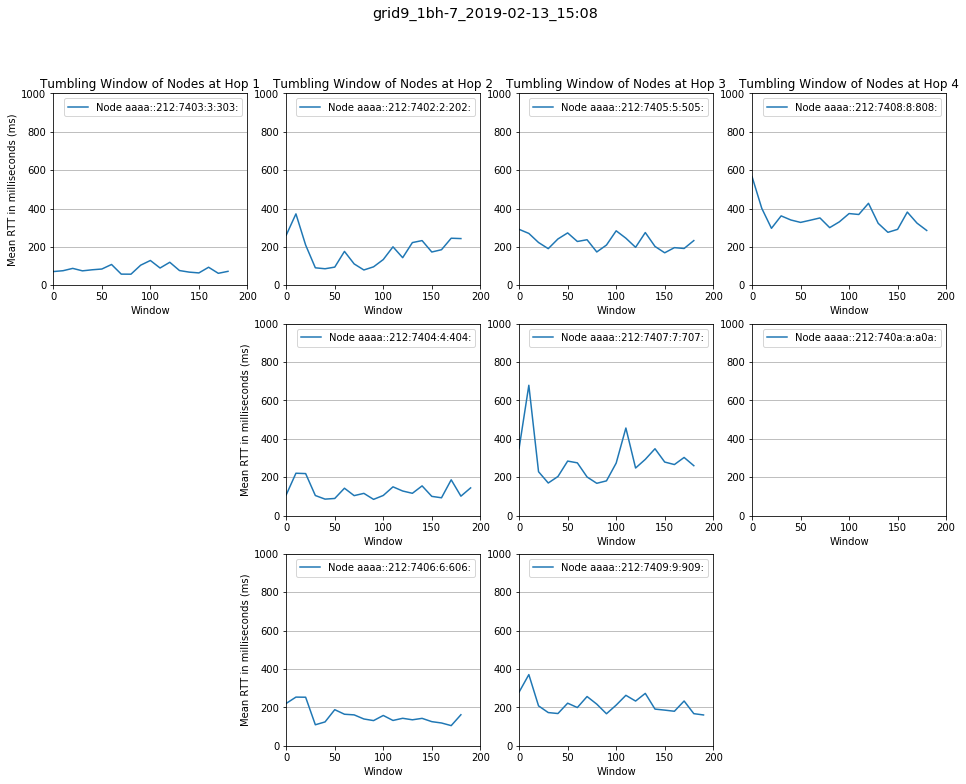

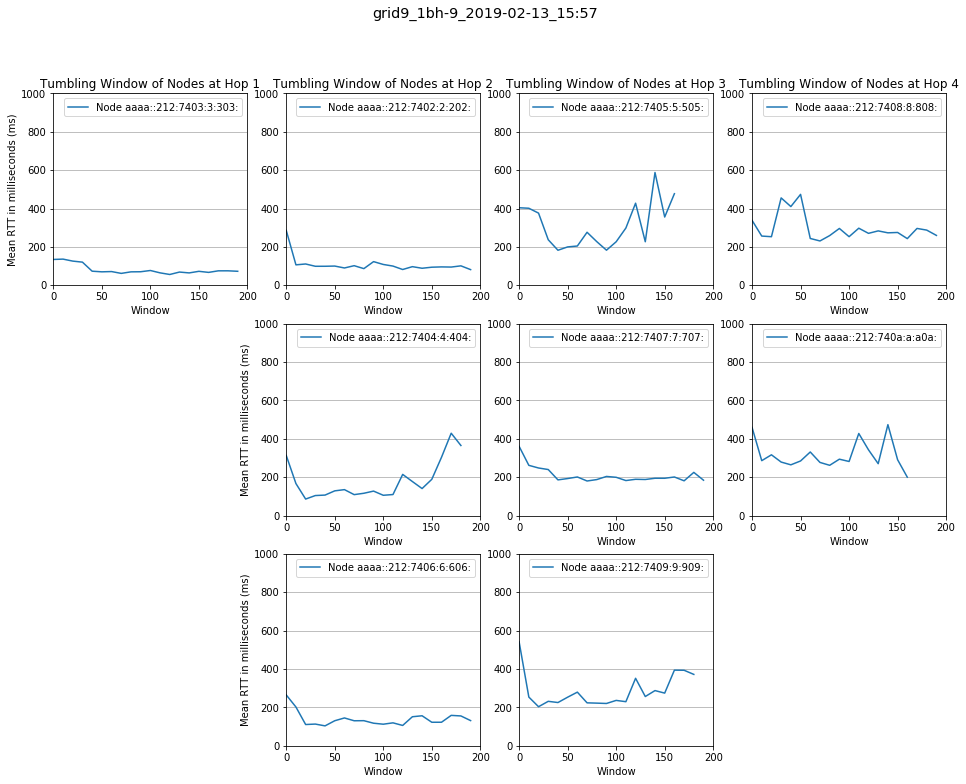

<Figure size 0x0 with 0 Axes>

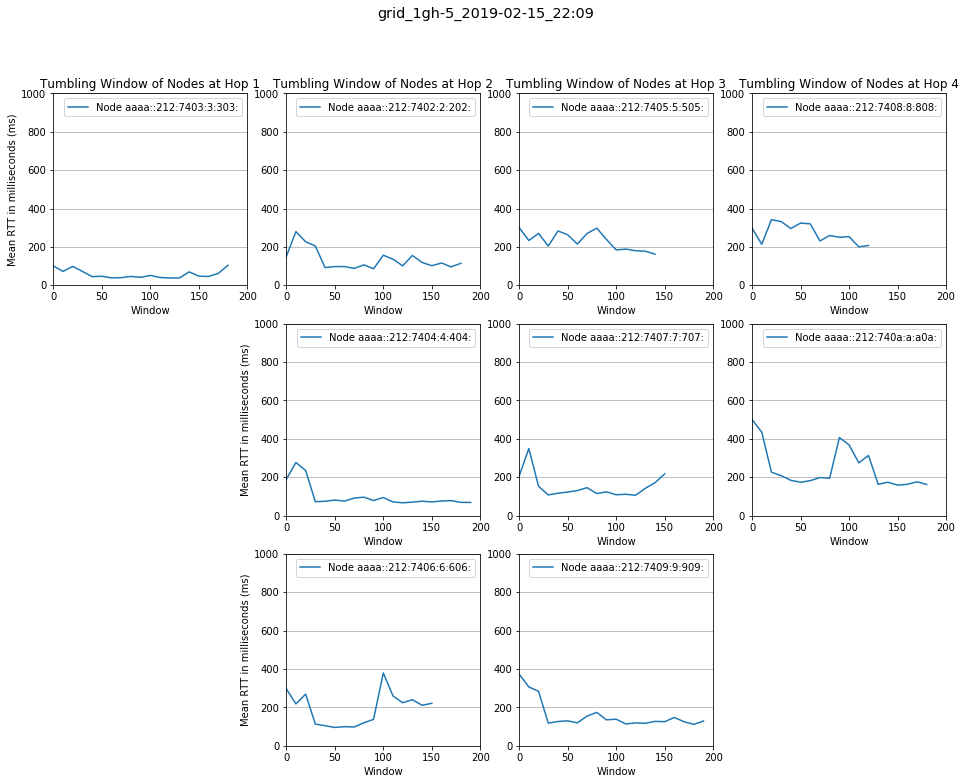

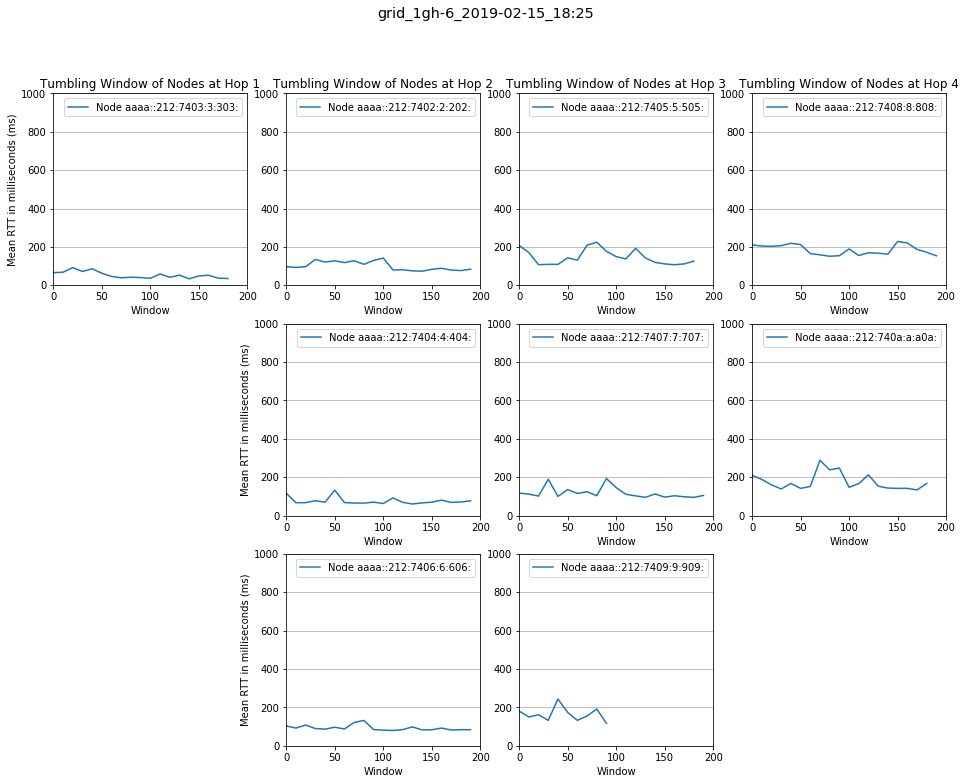

<Figure size 0x0 with 0 Axes>

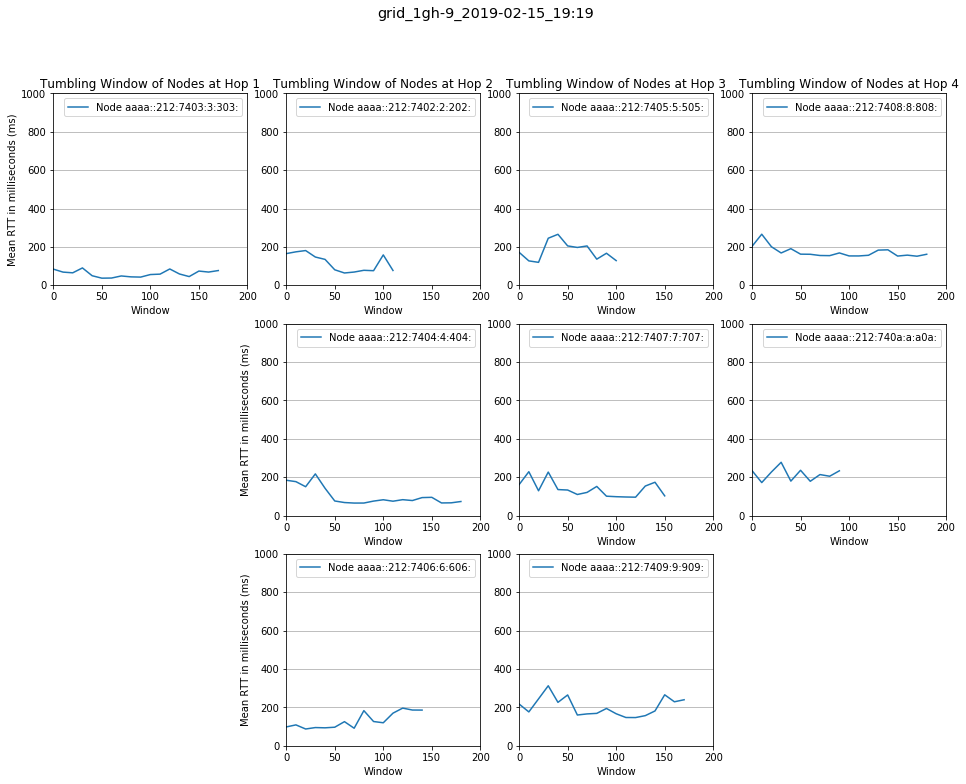

In [17]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    plots_analysis.plot_tumbling_windows_hops_nodes(nodes, packets_node, 200, 1000, row[1], 10)


Outliers => points our of mean-2std <= x(t) <= mean + 2std

Invalid IHDR data. Cannot save the image grid_1gh-5_2019-02-15_22:09-out-hist.png
Invalid IHDR data. Cannot save the image grid9_1bh-7_2019-02-13_15:08-out-hist.png


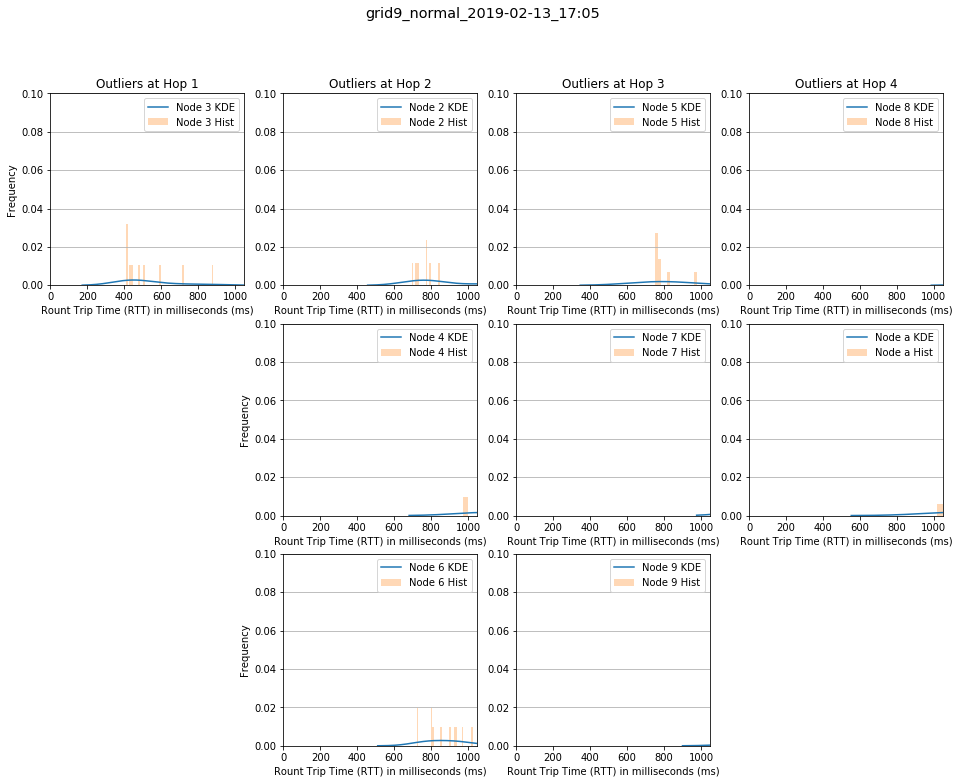

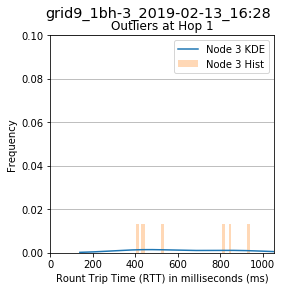

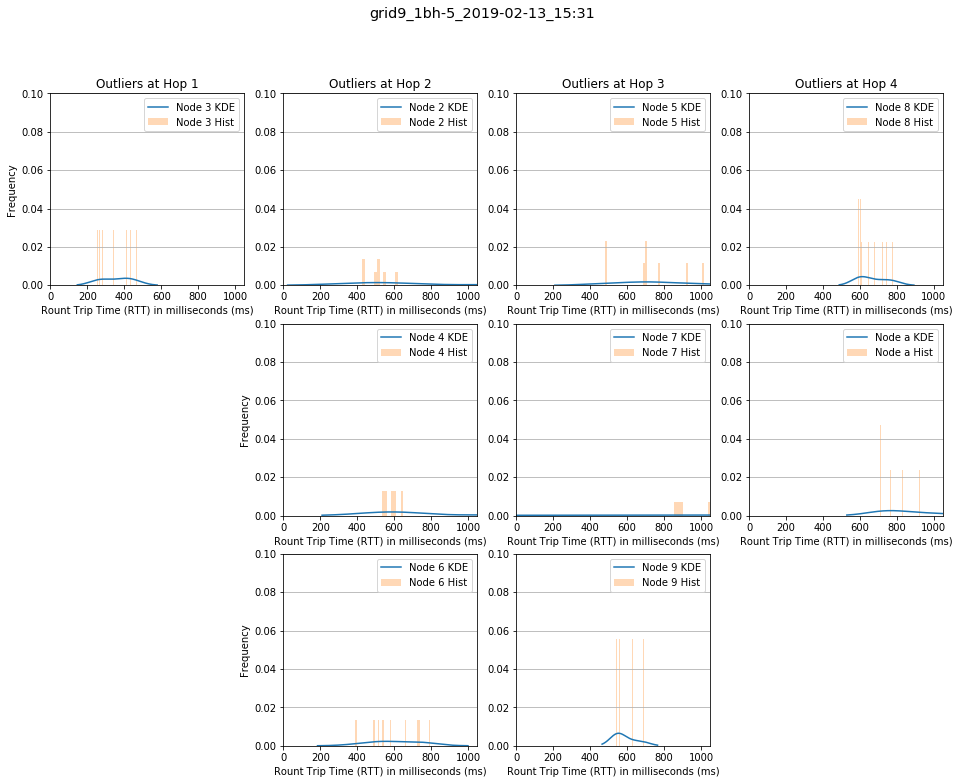

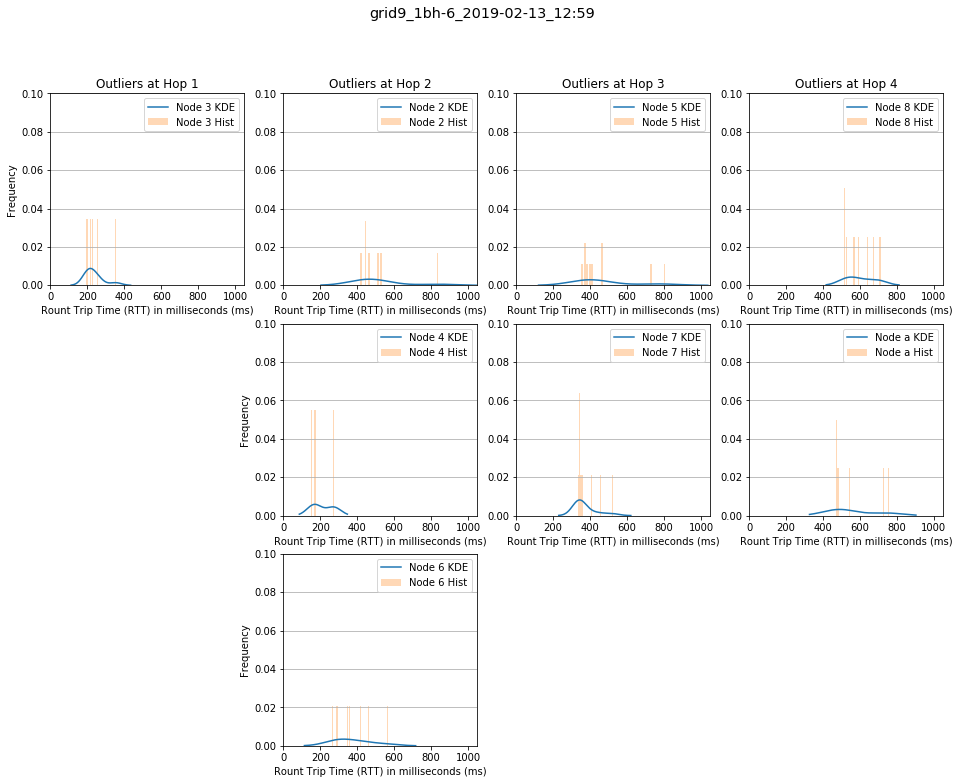

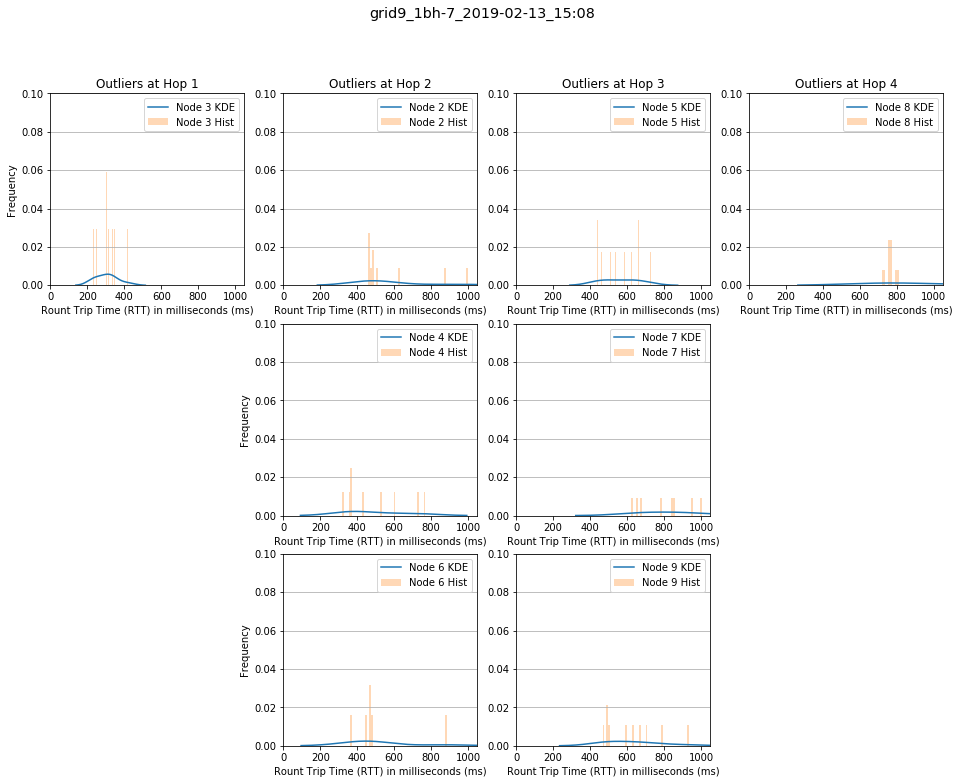

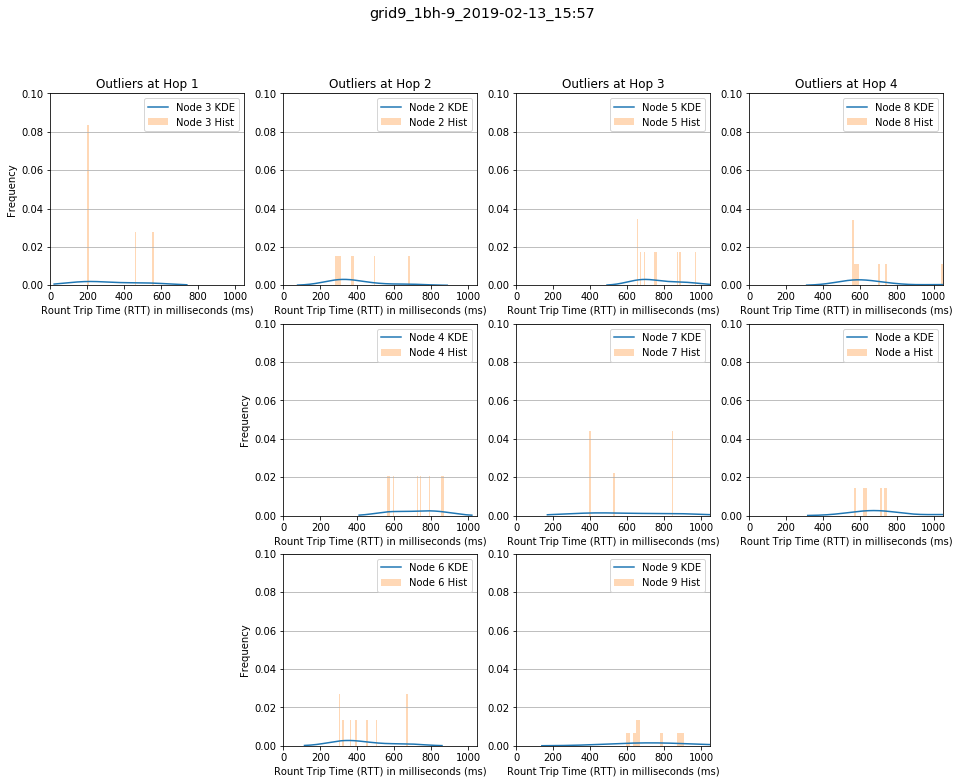

<Figure size 0x0 with 0 Axes>

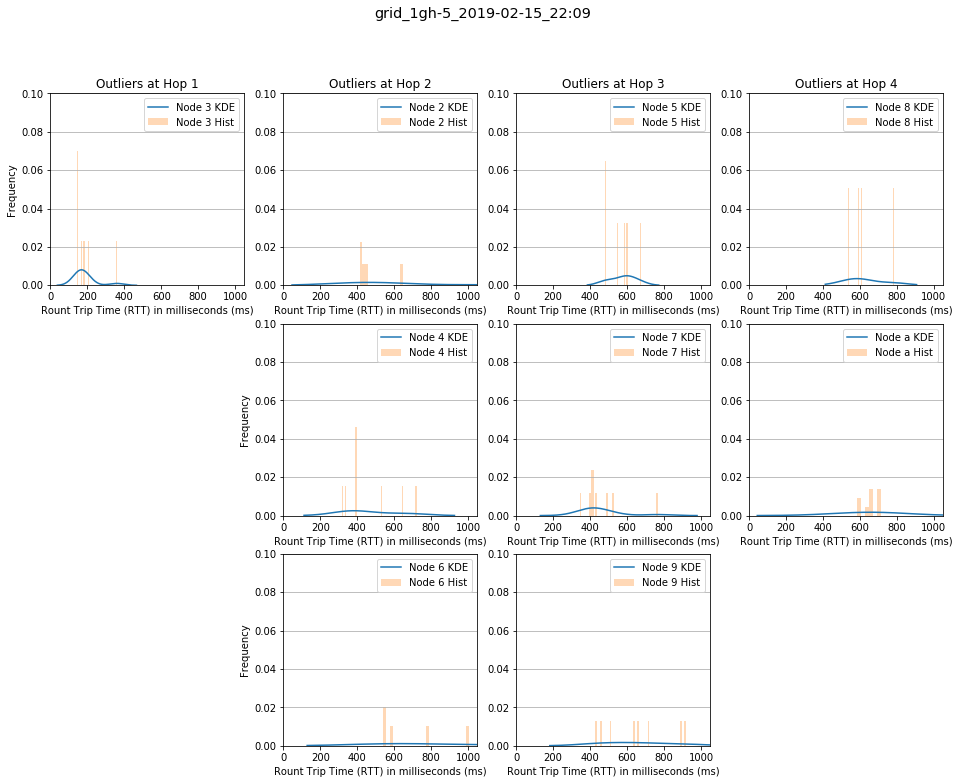

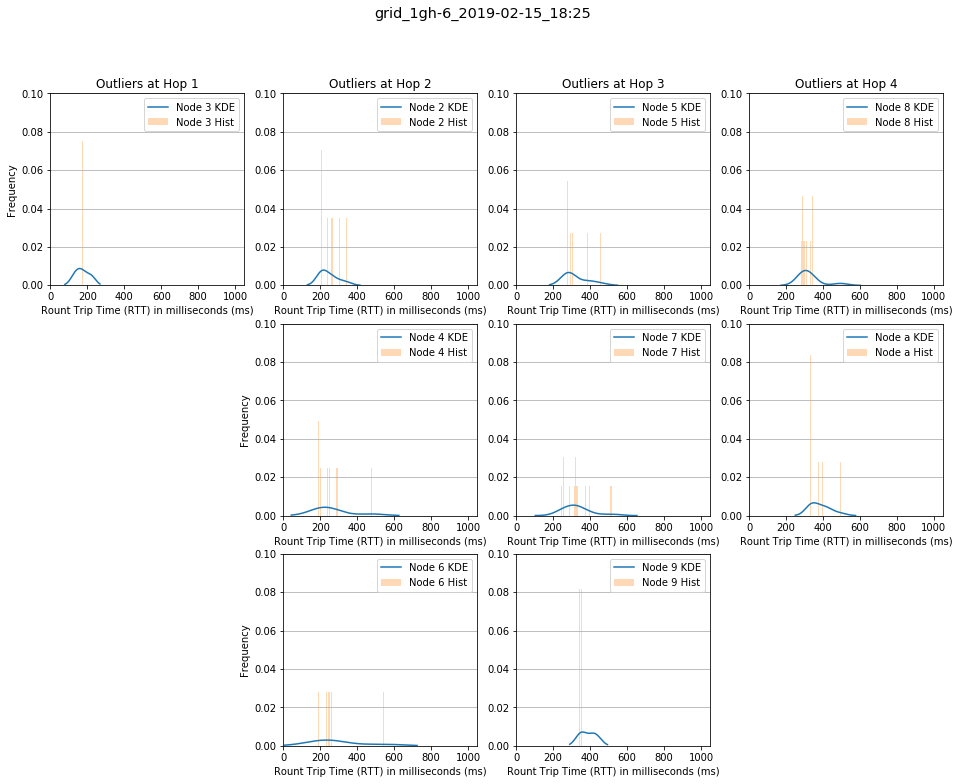

<Figure size 0x0 with 0 Axes>

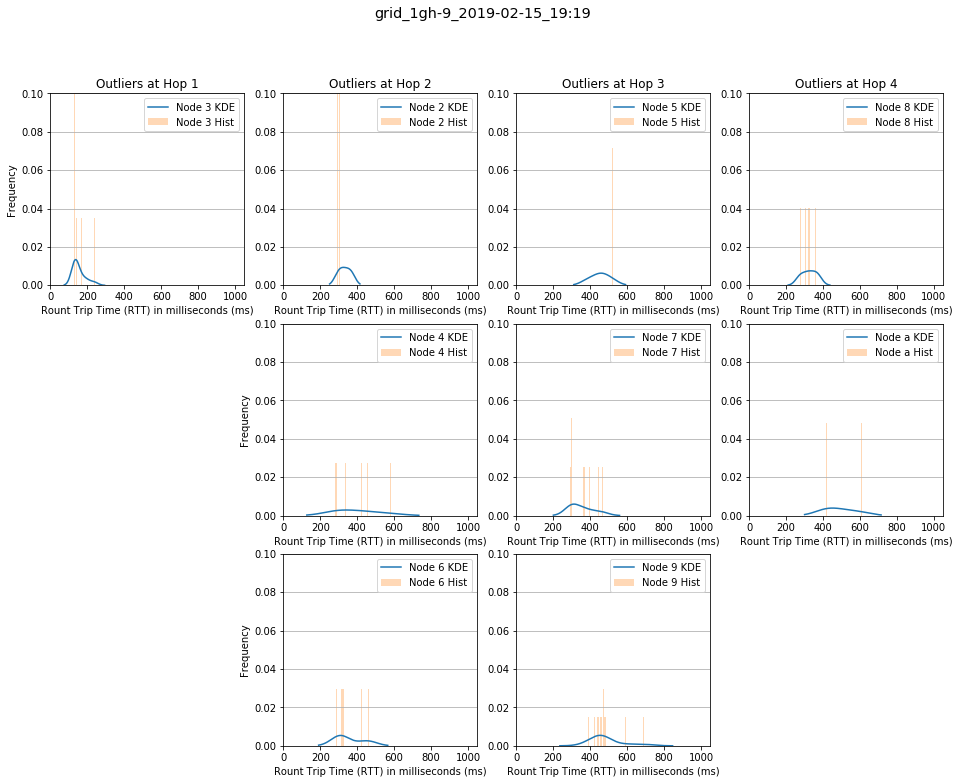

In [5]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_outliers_hops_nodes(nodes, outliers, 1050, 0.1, row[1])

IQR outliers

Invalid IHDR data. Cannot save the image grid_1gh-5_2019-02-15_22:09-out-iqr-hist.png
Invalid IHDR data. Cannot save the image grid9_1bh-7_2019-02-13_15:08-out-iqr-hist.png


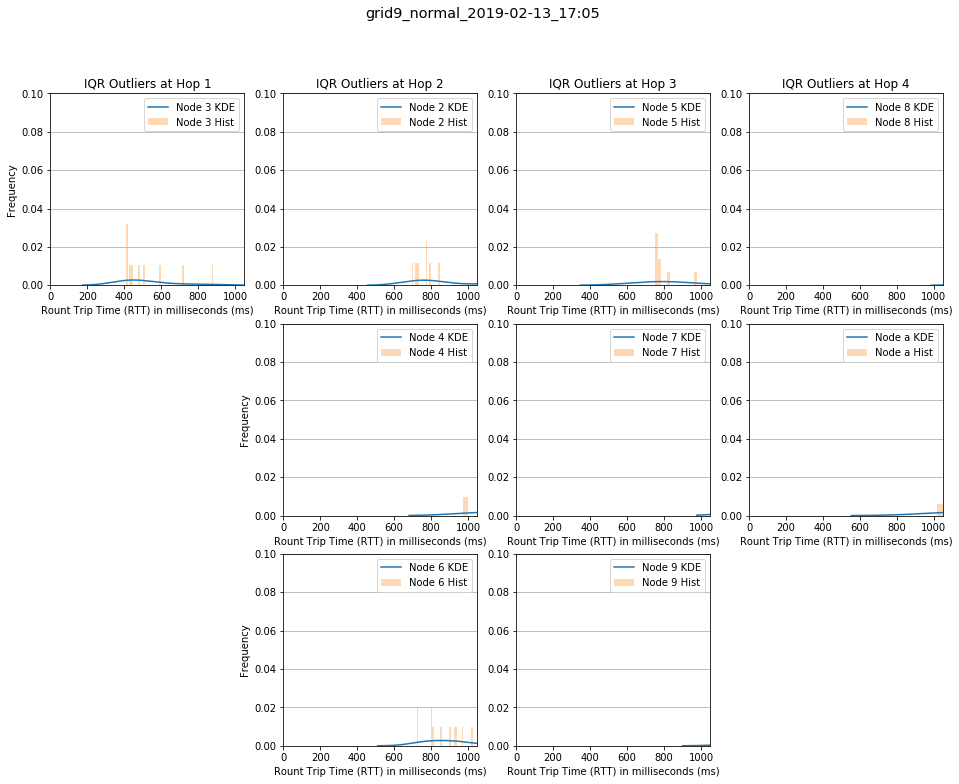

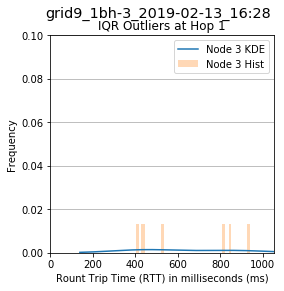

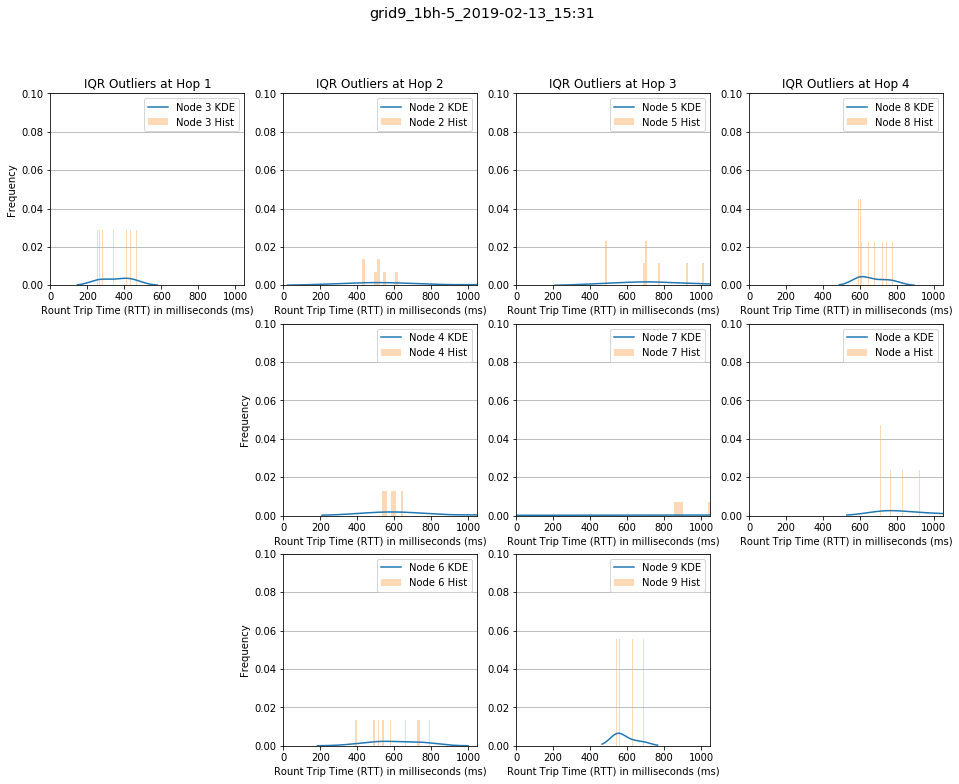

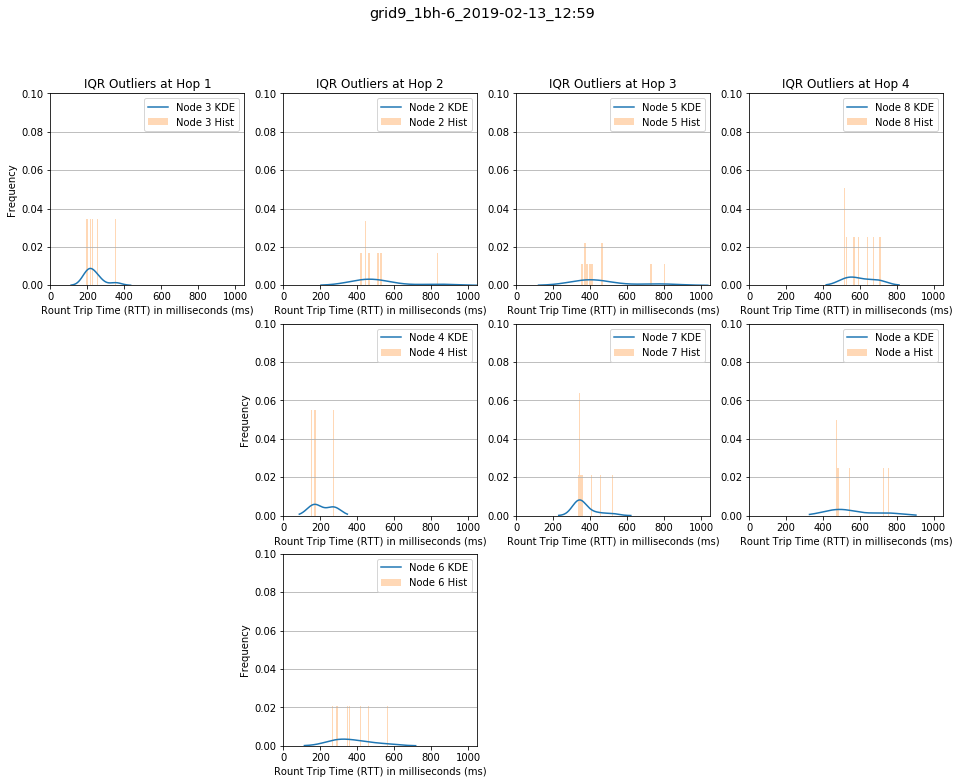

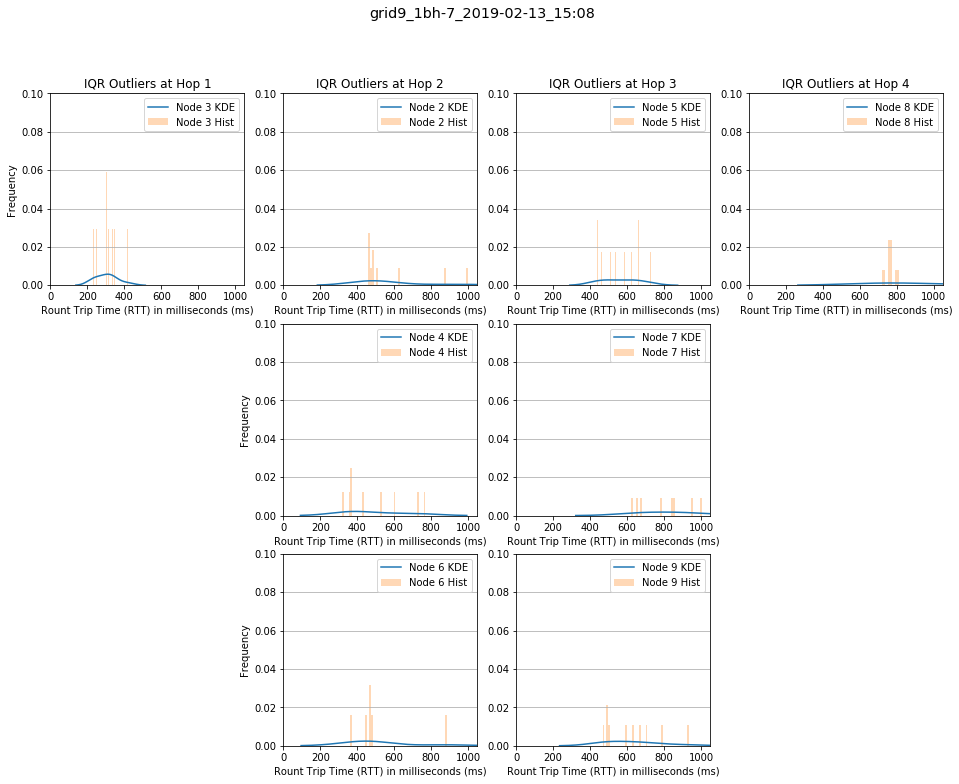

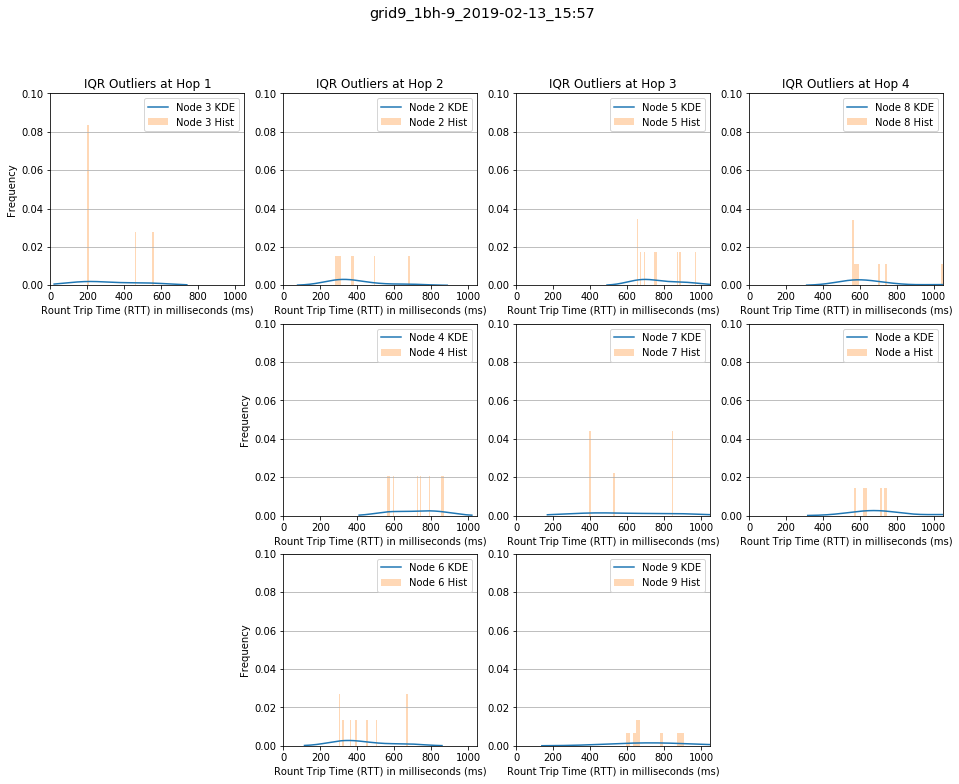

<Figure size 0x0 with 0 Axes>

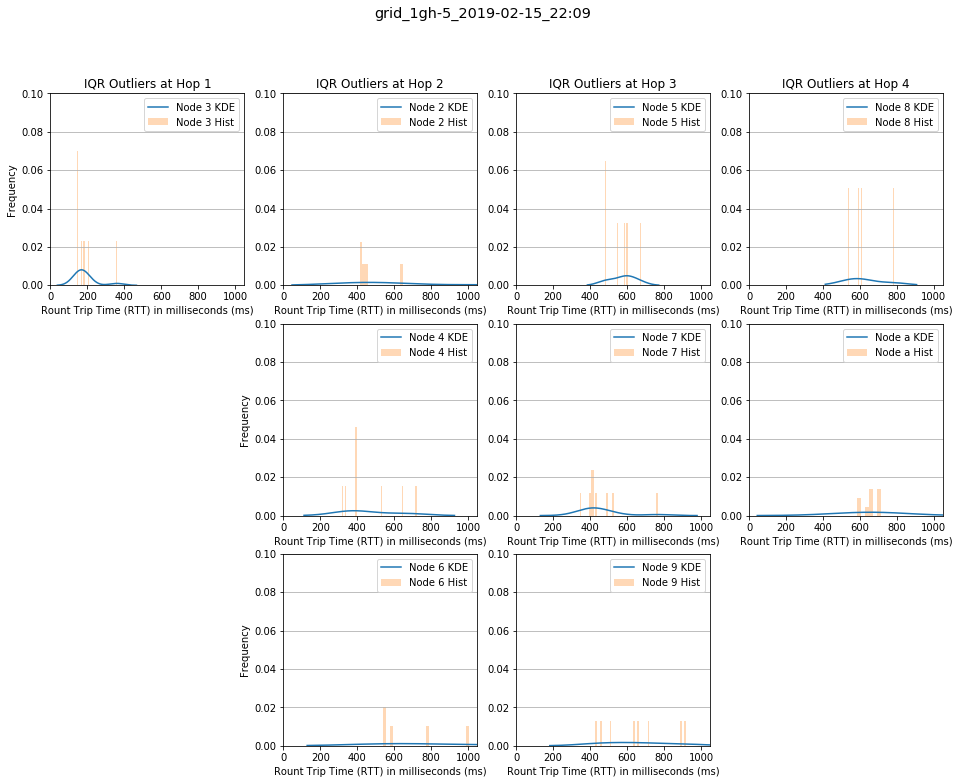

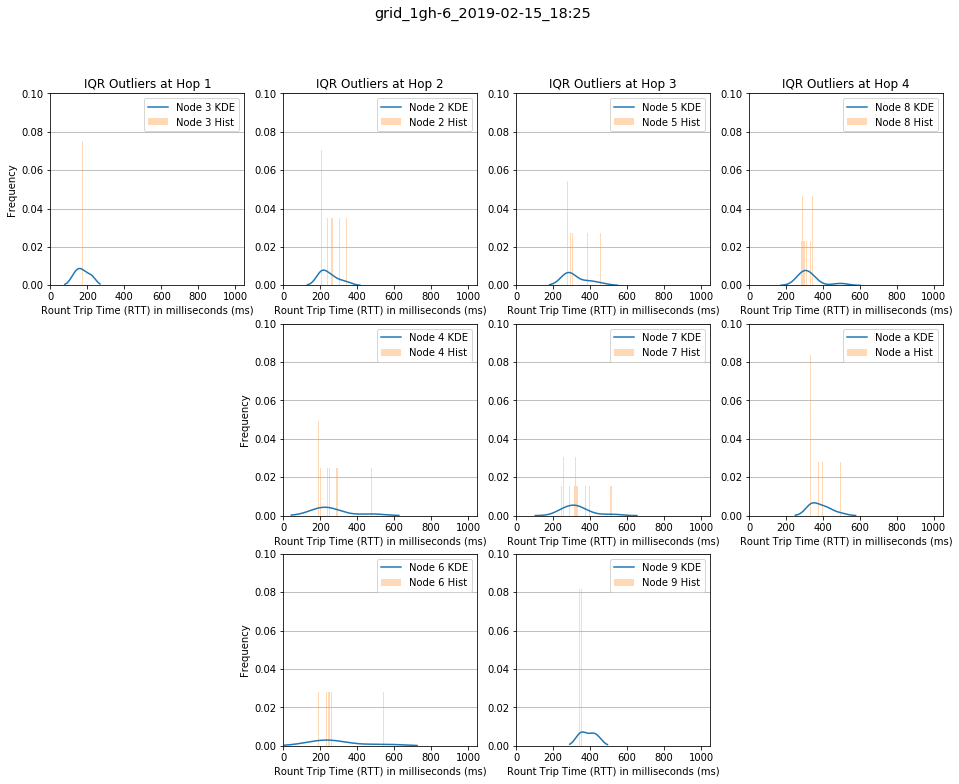

<Figure size 0x0 with 0 Axes>

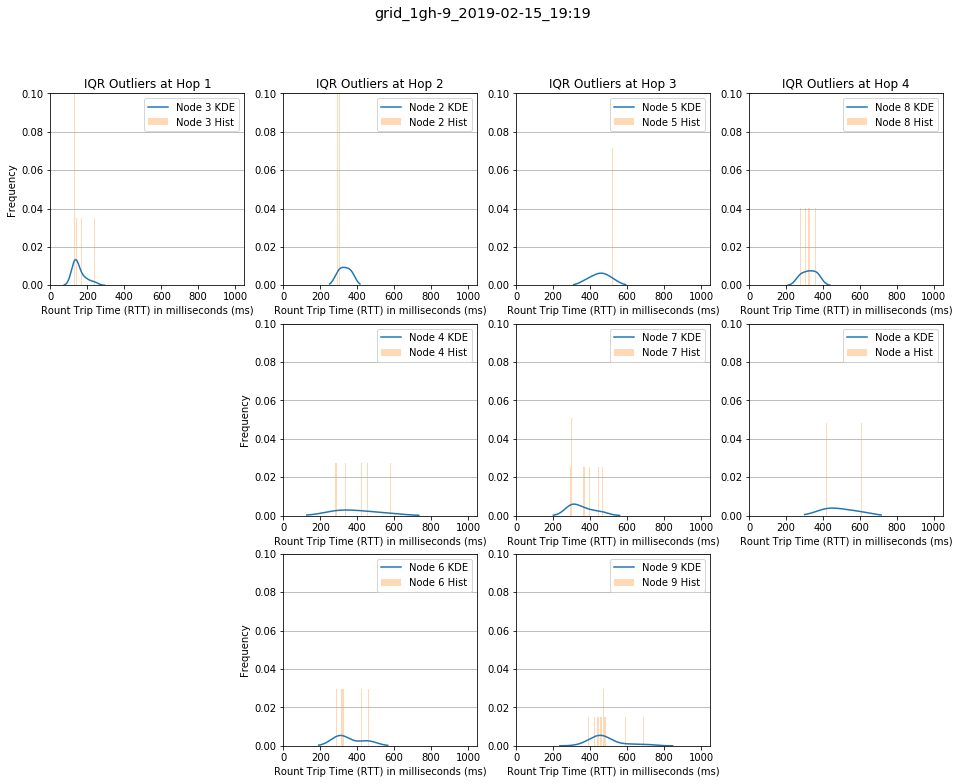

In [6]:
for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    iqr_outliers = trace_analysis.compute_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_iqr_outliers_hops_nodes(nodes, iqr_outliers, 1050, 0.1, row[1])

Compute statistics for each node in every experiment

In [3]:
stats = None

for row in plots:
    label = 'Normal'
    # Assign a label
    if row[0].find('gh') >= 0:
        label = 'GH'
    elif row[0].find('bh') >= 0:
        label = 'BH'
        
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    experiment = row[1]
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, clean, label, experiment)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, clean, label, experiment)])

stats = stats.sort_values(by=['experiment', 'hop']).reset_index(drop=True)


In [4]:
stats

,node_id,experiment,count,mean,var,std,hop,min,max,loss,label
0,aaaa::212:7403:3:303:,grid9_1bh-3_2019-02-13_16:28,179,111.838547,5860.165303,76.551717,1,38.4,388.0,0.105,BH
1,aaaa::212:7403:3:303:,grid9_1bh-5_2019-02-13_15:31,175,84.670286,2495.291871,49.952897,1,29.0,238.0,0.125,BH
2,aaaa::212:7402:2:202:,grid9_1bh-5_2019-02-13_15:31,187,100.954545,1761.499697,41.970224,2,57.5,319.0,0.065,BH
3,aaaa::212:7406:6:606:,grid9_1bh-5_2019-02-13_15:31,176,126.023295,1470.871054,38.351937,2,76.9,307.0,0.120,BH
4,aaaa::212:7404:4:404:,grid9_1bh-5_2019-02-13_15:31,156,179.128205,13053.307070,114.251070,2,60.9,504.0,0.220,BH
5,aaaa::212:7409:9:909:,grid9_1bh-5_2019-02-13_15:31,145,282.372414,9218.263123,96.011786,3,112.0,508.0,0.275,BH
6,aaaa::212:7407:7:707:,grid9_1bh-5_2019-02-13_15:31,168,264.065476,20163.941795,141.999795,3,133.0,814.0,0.160,BH
7,aaaa::212:7405:5:505:,grid9_1bh-5_2019-02-13_15:31,184,187.277174,2395.403629,48.942861,3,138.0,430.0,0.080,BH
8,aaaa::212:7408:8:808:,grid9_1bh-5_2019-02-13_15:31,170,296.841176,10034.808945,100.173894,4,151.0,572.0,0.150,BH
9,aaaa::212:740a:a:a0a:,grid9_1bh-5_2019-02-13_15:31,156,313.141026,18765.825145,136.988412,4,166.0,656.0,0.220,BH
